In [1]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_data = pd.read_csv('train_data_1.csv')
train_data

,customer_ID,B_1,R_1,S_3,D_47,B_7,B_11,S_8,D_58,S_15,B_23,R_10,D_122,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.008724,0.009228,0.124035,0.525351,0.059416,0.002768,2896,0.158612,4,0.050882,0,3,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.025782,0.005515,0.089799,0.382562,0.032390,0.011677,1880,0.007069,5,0.014834,0,2,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.001472,0.005955,NaN,0.318290,0.029138,0.001677,0,0.079300,8,0.022871,0,1,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.070311,0.004228,0.407420,0.392230,0.252338,0.043140,1454,0.006255,6,0.214540,0,3,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.003433,0.007243,0.166190,0.465739,0.035662,0.009522,0,0.335621,8,0.024060,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.006084,0.009374,0.106511,0.199892,0.033493,0.003090,2380,0.009221,5,0.022149,0,6,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.431408,0.004702,0.324895,0.753185,0.335496,0.378606,0,0.426619,8,0.316597,0,2,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.063875,0.007620,0.084054,0.309093,0.042889,0.045848,2896,0.005257,4,0.032193,0,1,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.003494,0.005690,0.369159,0.565200,0.202482,0.000698,0,0.113516,8,0.159167,0,2,1


In [7]:
X = train_data[['D_47', 'S_15', 'B_23', 'R_10']]
y = train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = DecisionTreeClassifier(max_depth = 7, random_state = 0)

model.fit(X_train, y_train) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [8]:
def amex_metric_mod(y_true, y_pred):

    labels     = np.transpose(np.array([y_true, y_pred]))
    labels     = labels[labels[:, 1].argsort()[::-1]]
    weights    = np.where(labels[:, 0] == 0, 20, 1)
    cut_vals   = labels[np.cumsum(weights) <= int(0.04 * np.sum(weights))]
    top_four   = np.sum(cut_vals[:,0]) / np.sum(labels[:,0])

    gini = [0,0]
    for i in [1,0]:
        labels         = np.transpose(np.array([y_true, y_pred]))
        labels         = labels[labels[:, i].argsort()[::-1]]
        weight         = np.where(labels[:,0] == 0, 20, 1)
        weight_random  = np.cumsum(weight / np.sum(weight))
        total_pos      = np.sum(labels[:, 0] *  weight)
        cum_pos_found  = np.cumsum(labels[:, 0] * weight)
        lorentz        = cum_pos_found / total_pos
        gini[i]        = np.sum((lorentz - weight_random) * weight)

    return 0.5 * (gini[1]/gini[0] + top_four)

acc_1 = amex_metric_mod(y_train, y_train_pred)
acc_2 = amex_metric_mod(y_test, y_test_pred)
print('train', acc_1)
print('test', acc_2)

train 0.25084922047034514
test 0.24731105867752906


In [21]:
test_data = pd.read_csv('test_data_1.csv')

In [22]:
X = test_data[['D_47', 'S_15', 'B_23', 'R_10']]
test_pred = model.predict(X)

In [23]:
table = pd.DataFrame({'customer_ID': test_data['customer_ID'], 'prediction': test_pred})

In [24]:
table1 = table.drop_duplicates(['customer_ID'])

In [25]:
table2 = table1.set_index('customer_ID')

In [26]:
table2.to_csv('C:/Users/andry/OneDrive/Рабочий стол/Solve.csv')

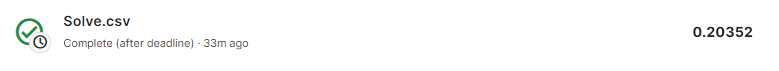